<a href="https://colab.research.google.com/github/DeboraOliver/MachineLearning_lessons/blob/main/Clusterization_(K_means%2C_DBSCAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means 

O algoritmo K-means é usado para classificação quando não há rótulos nos dados. O objetivo desse tipo de algoritmo é procurar por similaridades e criar grupos a partir dos dados

Quanto maior k, maior a complexidade e piora a performance.



[0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 1 1 0 2]
[[ 44.71428571 155.57142857]
 [123.66666667 178.66666667]
 [ 81.88888889 179.11111111]]


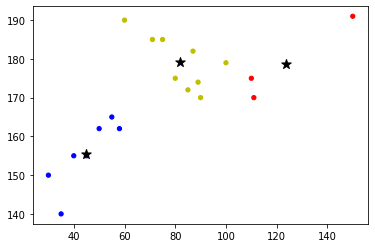

In [2]:
#Importando as bibliotecas.

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#Lendo o arquivo criado com os dados dos pacientes: peso vs. altura.

peso = [30, 35, 40,45,50,55,60,75,80,85,90,100,110,87,71,150,111,58,89]
altura = [150,140,155,155,162,165,190,185,175,172,170,179,175,182,185,191,170,162,174]

df = pd.DataFrame({'peso':peso, 'altura': altura })

#Cria uma matriz contendo todos os dados do arquivo CSV

X = np.array(list(zip(df["peso"],df["altura"])))

#Define o valor de K. O K é a quantidade de grupos que serão criados.

k=3

#Cria e chama o classificador K-means.

kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

#Imprime a classificação de cada dado, 0 para cluster0, 1 para cluster1, etc...

print(labels)

#Imprime os pontos de cada centroide do tipo valor x:y (eixo horizontal e eixo vertical).

print(centroids)

#Cria cores para os rótulos (classes).

c = ["b","r","y","g","c","m"]

colors = [c[i] for i in labels]

#Cria o gráfico e imprime.

plt.scatter(df["peso"],df["altura"], c=colors, s=18)

#Adiciona os pontos para os centroides no gráfico.

plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", s=100, c="black")

# DBSCAN

O algoritmo Density-Based Spatial Clustering of Applications with Noise (DBSCAN) é utilizado para a classificação de dados sem rótulos, assim como o K-means.

O atributo s define o tamanho do ponto no gráfico, quanto menor, mais pontos é possível visualizar. A seguir, você vai entender melhor o que foi gerado a partir desse código na sequência.

Quando a função make_moons é chamada, é preciso definir o número de amostras (dados) que serão geradas para formar a lua. Quanto maior o número de amostras, mais coletas de dados haverá. O atributo noise indica a porcentagem de ruído que terá nos dados, gerando dados fora do desenho da lua para dificultar o trabalho do algoritmo de clusterização. Por fim, o “random_state” define a geração da aleatoriedade. Para ter os dados exatamente como os mostrados nesses exemplos, utilize o “random_state=23”.

Complementando, o atributo “eps” é o mais importante na criação do algoritmo DBSCAN. Esse atributo vai definir como será feita a clusterização, ele especifica a distância máxima entre os elementos para serem considerados vizinhos. A variável min_samples define a quantidade de amostras mínimas para serem consideradas na vizinhança para ser considerado como core point.

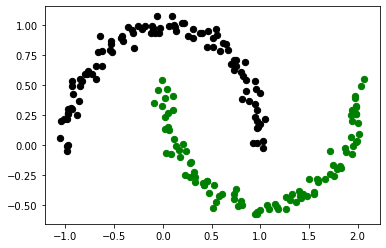

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=23)

plt.scatter(X[y==0,0], X[y==0,1],c="black", marker="o", s=40, label="cluster 1")

plt.scatter(X[y==1,0], X[y==1,1], c="green", marker="o", s=40, label="cluster 2")

plt.show()

# DIFERENÇAS

O algoritmo K-means difere principalmente do DBSCAN na detecção de ruídos. O K-means não considera que pode haver ruído nos dados e isso pode levar a clusterizações erradas ou incompletas. O DBSCAN identifica dados que estão muito distantes dos demais e considera isso como ruído nos dados, ou seja, descarta aqueles dados na classificação para melhorar a precisão da classificação. Ambos os algoritmos não definem valores máximos do número de clusters, porém nos dois é preciso definir a quantidade de clusters que se deseja criar antes de executar o algoritmo.